## Dependecies

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## 2. Load Dataset

In [26]:
from tensorflow.keras import datasets
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
print("{} train samples and {} test samples\n".format(len(x_train), len(x_test)))
print("train samples shape:", x_train.shape)
print("train labels shape:", y_train.shape)

50000 train samples and 10000 test samples

train samples shape: (50000, 32, 32, 3)
train labels shape: (50000, 1)


## 3. Map Classes

In [27]:
classes = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}

## 4. Plot Samples

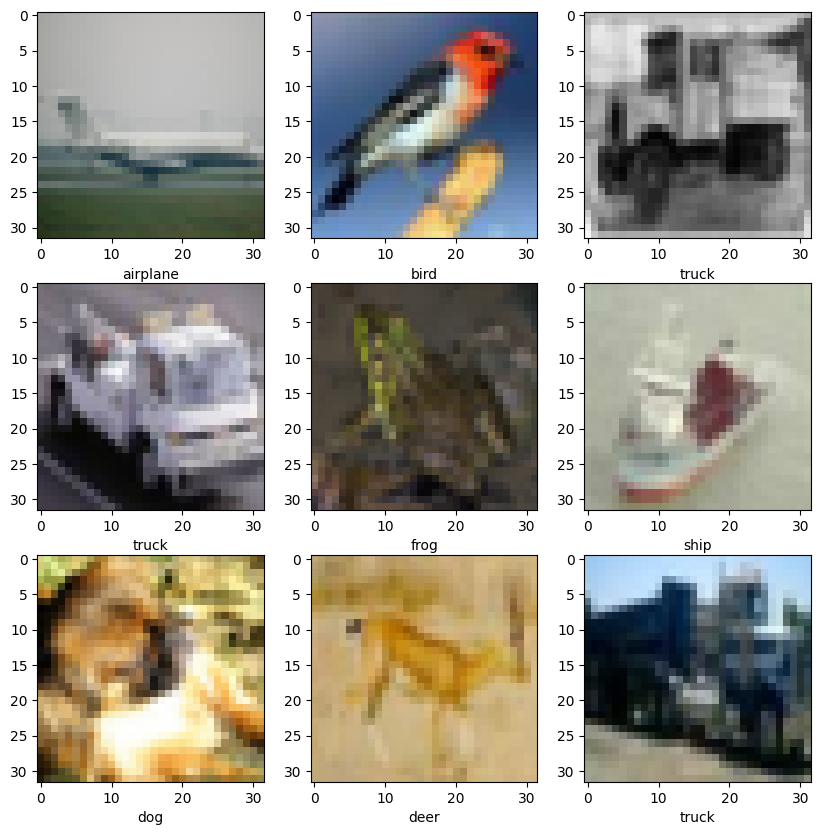

In [28]:
# select a random set of 9 images
idx = np.random.randint(len(x_train) - 9)

plt.figure(figsize=(10,10))
for i in range(9):
    # plot each sample
    plt.subplot(3, 3, i+1)   
    plt.imshow(x_train[i + idx]) 
    plt.xlabel(classes[(y_train[i + idx][0])])

# display results
plt.show()

## 5. Normalize Samples

In [29]:
print("before normalization:\n", x_train[0][0][0])

x_train = x_train / 255.
x_test = x_test / 255.

print("after normalization:\n", x_train[0][0][0])

before normalization:
 [59 62 63]
after normalization:
 [0.23137255 0.24313725 0.24705882]


## 6. One Hot Encode Labels

In [30]:
print("before one hot:")
print("class {} represents a {}".format(y_train[0][0], classes[y_train[0][0]]))

from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("after one hot:")
print("class {} represents a {}".format(y_train[0], classes[np.argmax(y_train[0])]))

before one hot:
class 6 represents a frog
after one hot:
class [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] represents a frog


## 7. Define Neural Network

In [31]:
from tensorflow.keras import Sequential, layers

def build_model():
    model = Sequential()
    model.add(layers.Conv2D(32, 3, activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D(pool_size=(2,2))) 
    model.add(layers.Conv2D(32, 5, activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))  
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10))
    model.add(layers.Softmax())
    
    model.compile(
        optimizer ='adam',
        loss = 'categorical_crossentropy',
        metrics = ['accuracy'])
    return model

In [32]:
model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        25632     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

## 8. Train Model

### 8.1 Perform Training

In [33]:
%%time
# train model
history = model.fit(x_train, y_train, epochs=15)
# save model to file
model.save('cifar10.keras')

# access metrics from training history
print("\ninitial accuracy: {} | latest accuracy: {}".format(history.history["accuracy"][0], history.history["accuracy"][-1]))
print("initial loss: {} | latest loss: {}".format(history.history["loss"][0], history.history["loss"][-1]))

Epoch 1/15
1563/1563 [==============================] - 73s 46ms/step - loss: 1.4203 - accuracy: 0.4939
Epoch 2/15
1563/1563 [==============================] - 69s 44ms/step - loss: 1.0837 - accuracy: 0.6178
Epoch 3/15
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9591 - accuracy: 0.6645
Epoch 4/15
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8794 - accuracy: 0.6918
Epoch 5/15
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8167 - accuracy: 0.7150
Epoch 6/15
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7631 - accuracy: 0.7328
Epoch 7/15
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7145 - accuracy: 0.7499
Epoch 8/15
1563/1563 [==============================] - 65s 41ms/step - loss: 0.6726 - accuracy: 0.7641
Epoch 9/15
1563/1563 [==============================] - 65s 42ms/step - loss: 0.6336 - accuracy: 0.7769
Epoch 10/15
1563/1563 [==============================] - 67s 43m

### 8.2 Plot Training Results

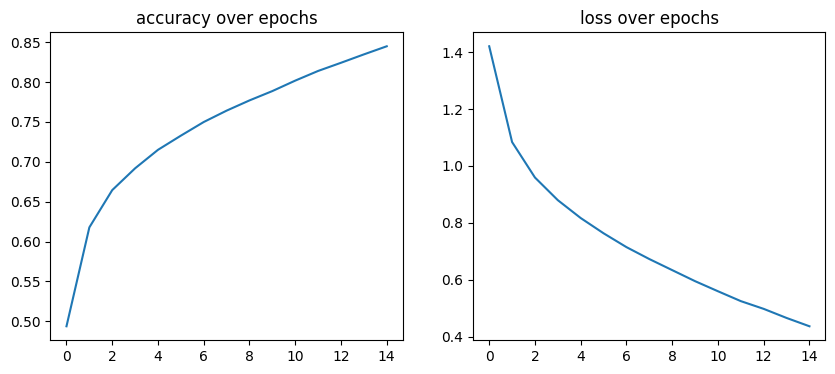

In [34]:
fig, axis = plt.subplots(1, 2, figsize=(10,4)) 
# plot accuracy
axis[0].plot(history.history["accuracy"])
axis[0].set_title("accuracy over epochs")
# plot loss
axis[1].plot(history.history["loss"])
axis[1].set_title("loss over epochs")
plt.show()

## 9. Test Model

### 9.1 Evaluate

In [35]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\ntest accuracy score:', test_acc)

313/313 - 2s - loss: 1.0847 - accuracy: 0.6913 - 2s/epoch - 6ms/step

test accuracy score: 0.6912999749183655


### 9.2 Predictions of Samples

In [36]:
predictions = model.predict(x_test)
# fetch probabilities for each class
print("\nprediction probabilities per class:\n", predictions[0])
# fetch class with the highest probability
print("\npredicted class:", np.argmax(predictions[0]))
print("actual class:", np.argmax(y_test[0]))
# fetch readable class name
print("predicted class name:", classes[np.argmax(predictions[0])])
# compare with original label
print("actual class name:", classes[np.argmax(y_test[0])])

313/313 [==============================] - 2s 6ms/step

prediction probabilities per class:
 [2.03681905e-02 1.82985241e-05 3.17189167e-03 9.63426769e-01
 5.90632917e-05 1.23803215e-02 3.65790271e-04 2.26311272e-06
 2.07331759e-04 1.38481951e-07]

predicted class: 3
actual class: 3
predicted class name: cat
actual class name: cat


### 9.3 Plot Predictions

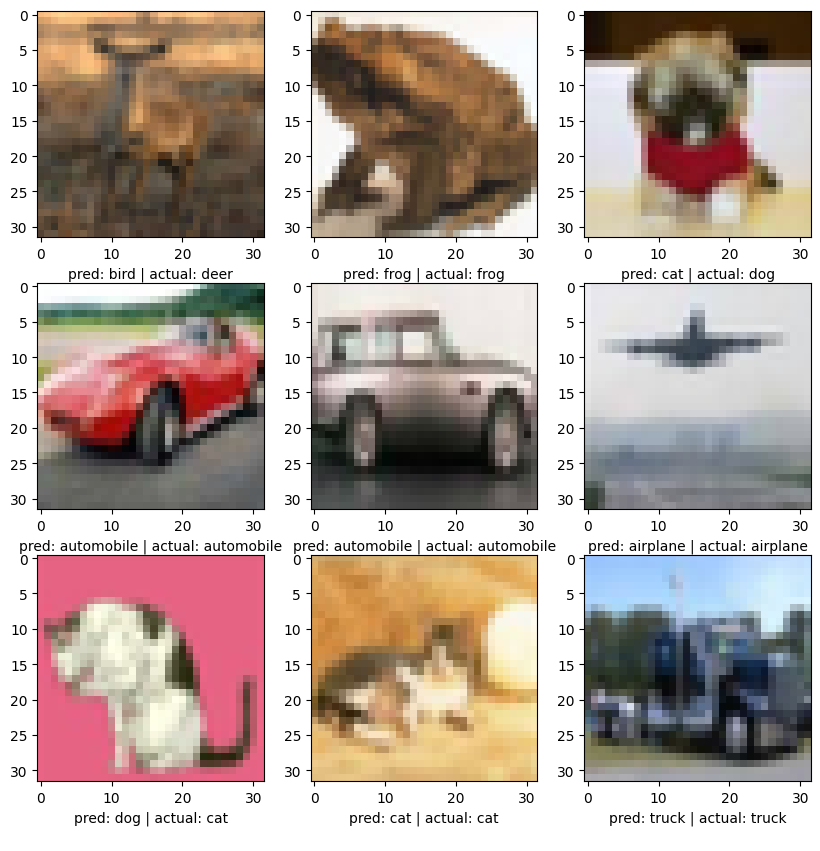

In [37]:
# select a random set of 9 test images
idx = np.random.randint(len(x_test) - 9)

plt.figure(figsize=(10,10))
for i in range(9):
    # plot each test image along with its prediction
    plt.subplot(3, 3, i+1)   
    plt.imshow(x_test[i + idx]) 
    plt.xlabel("pred: {} | actual: {}\n".format(classes[np.argmax(predictions[i + idx])], classes[np.argmax(y_test[i + idx])]))

# display results
plt.show()